### Functional API Task

In [17]:
from tensorflow.keras.datasets import mnist

(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Text(0.5, 1.0, '5')

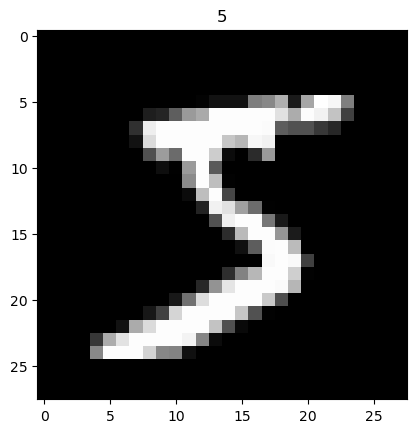

In [18]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='gray')
plt.title(train_targets[0])

In [19]:
import matplotlib.pyplot as plt

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

def show_images(images, targets, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_names[targets[i]])

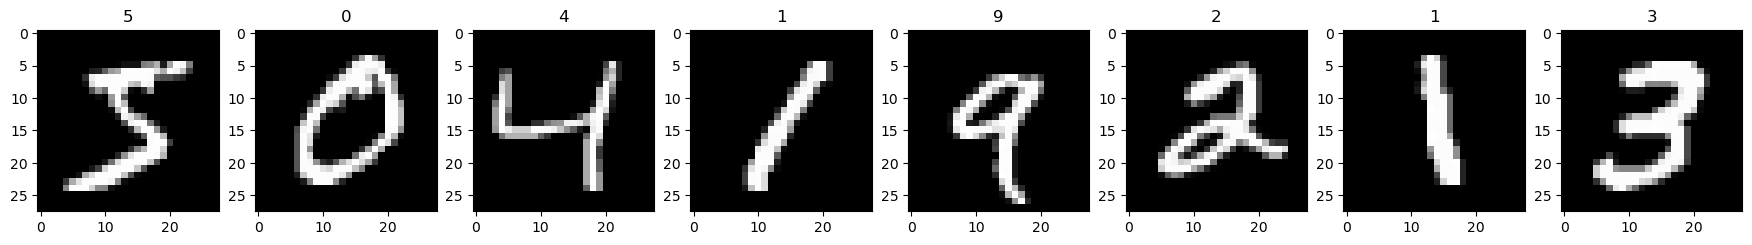

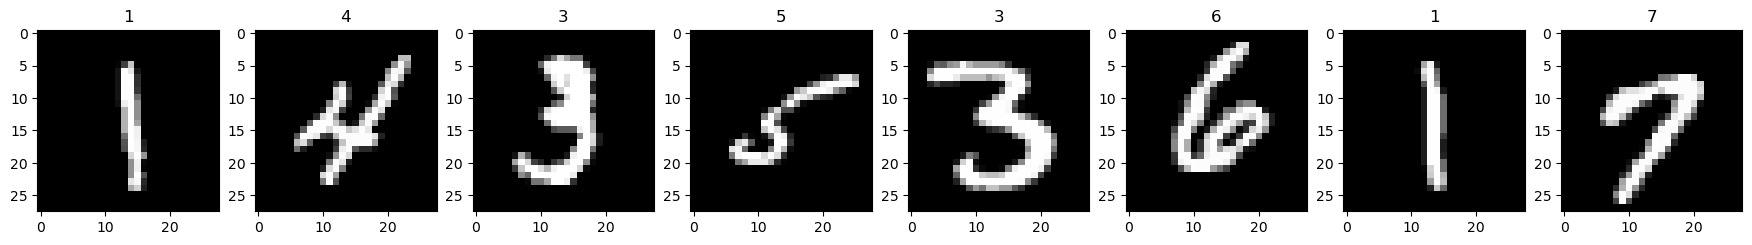

In [20]:
show_images(train_images[:8], train_targets[:8], ncols=8)
show_images(train_images[8:16], train_targets[8:16], ncols=8)

In [21]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

INPUT_SIZE = 28

def create_model():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(64, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=input_tensor, outputs = output)
    return model

In [22]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)
    
    return images, targets

def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)
    return images, oh_targets

def get_train_valid_test(train_images, train_targets, test_images, test_targets, valid_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)
    
    train_train_images, validation_images, train_train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=valid_size, random_state=random_state)

    return (train_train_images, train_train_oh_targets), (validation_images, validation_oh_targets),(test_images, test_oh_targets)

In [23]:
from tensorflow.keras.datasets import mnist

(train_images, train_targets), (test_images, test_targets) = mnist.load_data()
print(train_images.shape, train_targets.shape, test_images.shape, test_targets.shape)

(train_train_images, train_train_oh_targets), (validation_images, validation_oh_targets),(test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets, test_images, test_targets)
print(train_train_images.shape, train_train_oh_targets.shape, validation_images.shape, validation_oh_targets.shape, test_images.shape, test_oh_targets.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(48000, 28, 28) (48000, 10) (12000, 28, 28) (12000, 10) (10000, 28, 28) (10000, 10)


In [24]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model = create_model()
model.summary()

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                50240     
                                                                 
 dense_15 (Dense)            (None, 128)               8320      
                                                                 
 dense_16 (Dense)            (None, 10)                1290      
                                                                 
Total params: 59850 (233.79 KB)
Trainable params: 59850 (233.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
history = model.fit(x=train_train_images, y=train_train_oh_targets, batch_size=32, epochs=10, validation_data=(validation_images, validation_oh_targets))

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2847 - acc: 0.9189 - val_loss: 0.1651 - val_acc: 0.9500
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1261 - acc: 0.9623 - val_loss: 0.1079 - val_acc: 0.9679
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0890 - acc: 0.9727 - val_loss: 0.1167 - val_acc: 0.9643
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0714 - acc: 0.9776 - val_loss: 0.0903 - val_acc: 0.9711
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0557 - acc: 0.9822 - val_loss: 0.0925 - val_acc: 0.9728
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0463 - acc: 0.9844 - val_loss: 0.0944 - val_acc: 0.9718
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0391 - acc: 0.9876 - val_loss: 0.0825 - val_acc: 0.9752
Epoch 8/10
1500/1500 [==============================] - 3s 2ms

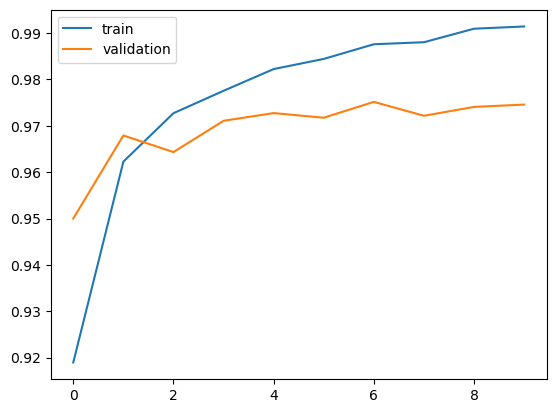

In [28]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()

show_history(history)

In [30]:
model.evaluate(test_images, test_oh_targets, batch_size=32)

313/313 [==============================] - 0s 1ms/step - loss: 0.1080 - acc: 0.9723


[0.10796994715929031, 0.9722999930381775]

In [34]:
pred_proba = model.predict(np.expand_dims(test_images[326], axis=0))
print('softmax output:', pred_proba)
pred = np.argmax(np.squeeze(pred_proba))
print('predicted target value:', pred)

1/1 [==============================] - 0s 27ms/step
softmax output: [[3.76837107e-07 2.00076611e-03 9.81423199e-01 2.30825510e-08
  4.15328905e-05 4.67806993e-09 1.65286884e-02 1.15841975e-10
  5.40623978e-06 1.11127182e-14]]
predicted target value: 2


Text(0.5, 1.0, '2')

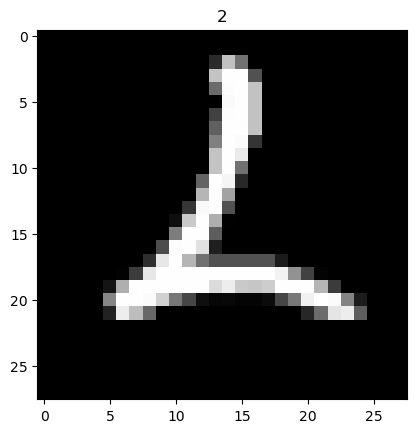

In [36]:
import matplotlib.pyplot as plt

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.imshow(test_images[326], cmap='gray')
plt.title(class_names[int(test_targets[326])])